In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv('/Users/lisahuiseva/Desktop/system-prompt-leak-detection/data_reshaped.csv')
data.head()

,rouge,levenshtein,jaccard,cosine,label
0,0.430108,0.515571,0.222222,0.701965,1
1,0.353591,0.653516,0.177966,0.728546,1
2,0.414508,0.577855,0.233333,0.788009,1
3,0.378378,0.671280,0.183333,0.842536,1
4,0.429379,0.638408,0.231481,0.863292,1


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       163
           1       0.99      0.98      0.99       116

    accuracy                           0.99       279
   macro avg       0.99      0.99      0.99       279
weighted avg       0.99      0.99      0.99       279

Accuracy Score: 0.989247311827957


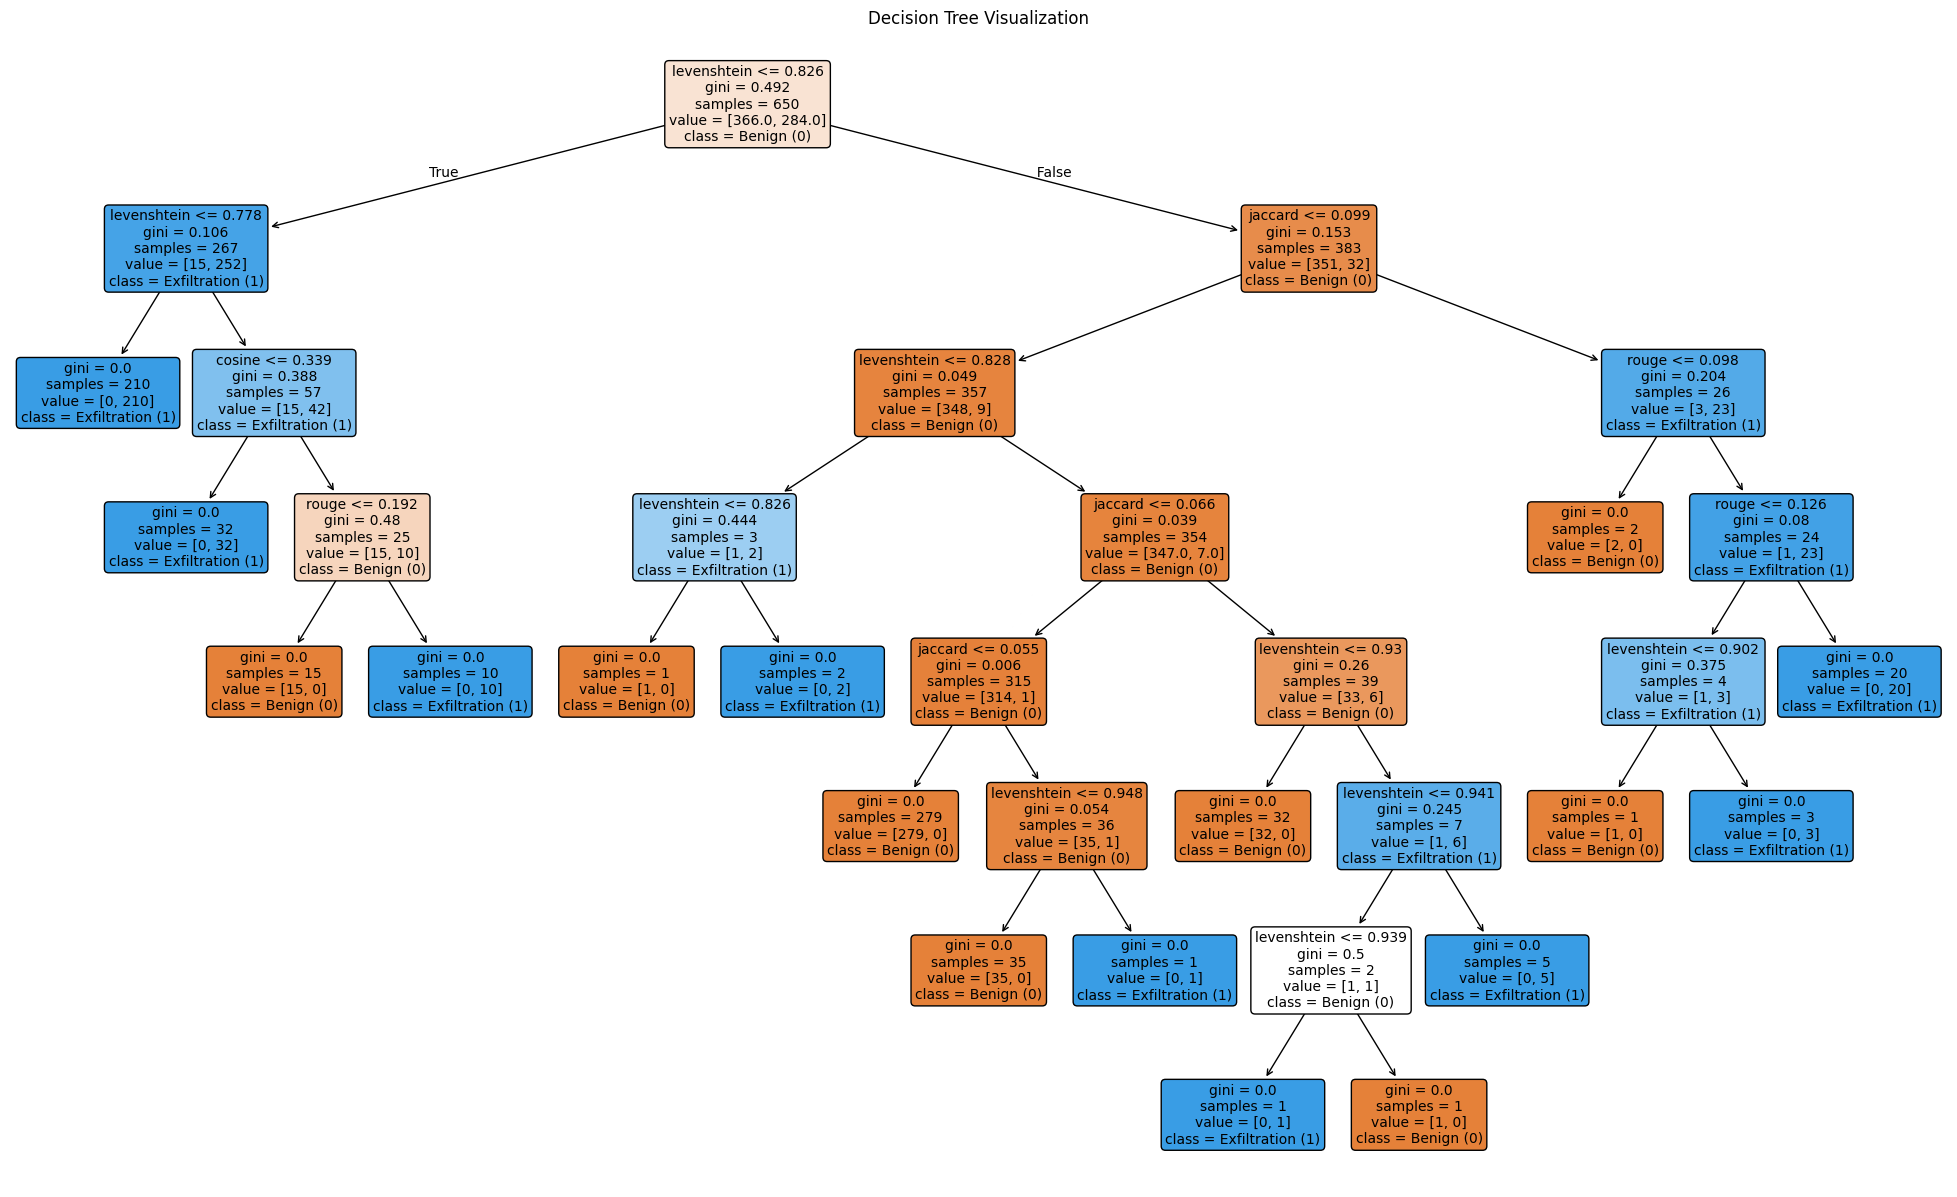

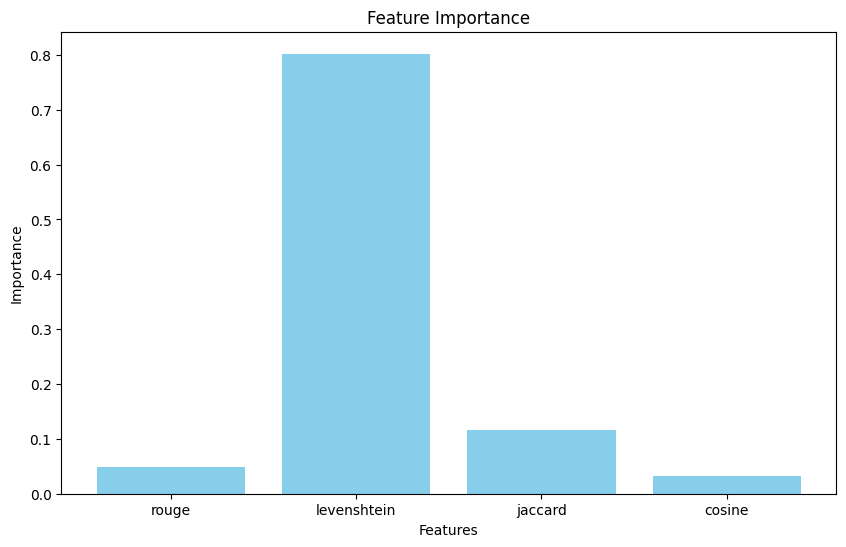

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Separate features and target
X = data[['rouge', 'levenshtein', 'jaccard', 'cosine']]  # Features
y = data['label']  # Target

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = clf.predict(X_test)

# Step 5: Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(25, 15))
plot_tree(
    clf,
    feature_names=['rouge', 'levenshtein', 'jaccard', 'cosine'],
    class_names=['Benign (0)', 'Exfiltration (1)'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# Plot feature importances
feature_importances = clf.feature_importances_
features = ['rouge', 'levenshtein', 'jaccard', 'cosine']

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Combinations of features

In [7]:
from itertools import combinations

# List of features
features = ['rouge', 'levenshtein', 'jaccard', 'cosine']

# Generate all non-empty combinations of features
feature_combinations = []
for r in range(1, len(features) + 1):
    feature_combinations.extend(combinations(features, r))

In [8]:
results = []

for combo in feature_combinations:
    # Select the features
    X = data[list(combo)]
    y = data['label']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Train the model
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results.append({'features': combo, 'accuracy': accuracy})

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)

In [ ]:
# Sort by accuracy
results_df = results_df.sort_values(by='accuracy', ascending=False)

# Display the top combinations
print("Top Feature Combinations by Accuracy:")
print(results_df.head())

Top Feature Combinations by Accuracy:
                                 features  accuracy
10          (rouge, levenshtein, jaccard)  0.992832
13         (levenshtein, jaccard, cosine)  0.992832
7                  (levenshtein, jaccard)  0.989247
14  (rouge, levenshtein, jaccard, cosine)  0.989247
4                    (rouge, levenshtein)  0.985663


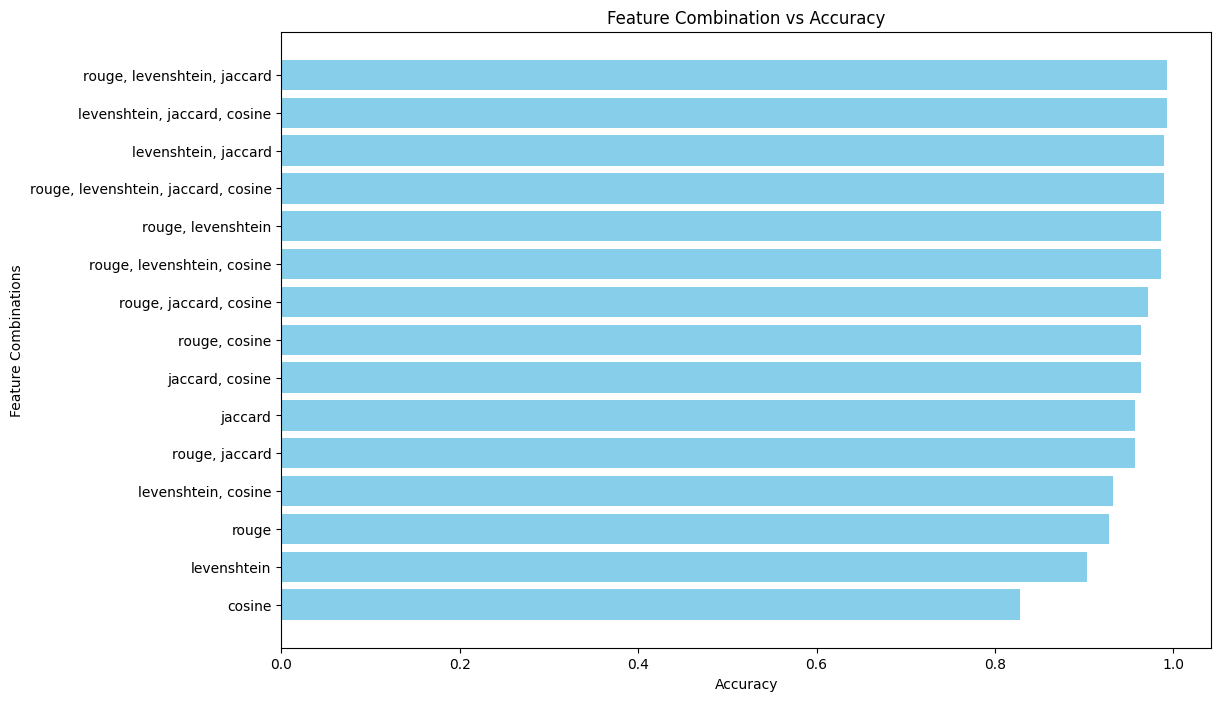

In [10]:
import matplotlib.pyplot as plt

# Convert feature combinations to strings for plotting
results_df['features_str'] = results_df['features'].apply(lambda x: ', '.join(x))

# Plot accuracy for each combination
plt.figure(figsize=(12, 8))
plt.barh(results_df['features_str'], results_df['accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Feature Combinations')
plt.title('Feature Combination vs Accuracy')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
}

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_split': 10}
Best cross-validated accuracy: 0.9861538461538462
